# K-Means Clustering Implementation   
## Liam Quinlan
CS 339   
Dr. Kretchmar

### Importing packages

In [302]:
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
import pandas as pd

datadir = "data"

### K-Means function

In [303]:
def kmeans(data, k):
    # Initialization
    centers = np.zeros((k,data.shape[1]))
    new_centers = centers
    distances = np.ones((k,data.shape[0]))

    sample_indices = np.random.choice(data.shape[0], k, replace=False)
    centers = data[sample_indices]
    print("Centers:\n", centers, "\n")

    # Learning
    for _ in range(20):
        # Compute Distances
        for x in range(k):
            for y in range(0,data.shape[0]):
                distance = np.linalg.norm(centers[x] - data[y])
                distances[x][y] = distance
        # print("Distances:\n", distances)

        # Identify closest clusters
        clusters = np.argmin(distances,axis=0)
        # print("Clusters:\n", clusters)

        # Update centers
        for z in range(k):
            new_centers[z] = np.array(data[clusters == z].mean(axis=0))
        # print("New Centers:\n", new_centers, "\n")

        # Check for repeat centers
        # does_array_repeat = centers == new_centers
        # if np.all(does_array_repeat) == True:
        #     break

        centers = new_centers

    return centers, clusters

### Testing K-Means on a small dataset

In [304]:
# initialize data
data1 = np.array([[1,2],[1,3],[1,5],[2,3],[2,1],[6,7],[5,6],[5,9],[7,6],[8,6]])
print(data1)

[[1 2]
 [1 3]
 [1 5]
 [2 3]
 [2 1]
 [6 7]
 [5 6]
 [5 9]
 [7 6]
 [8 6]]


In [305]:
centers, clusters = kmeans(data1, 2)

Centers:
 [[5 9]
 [5 6]] 



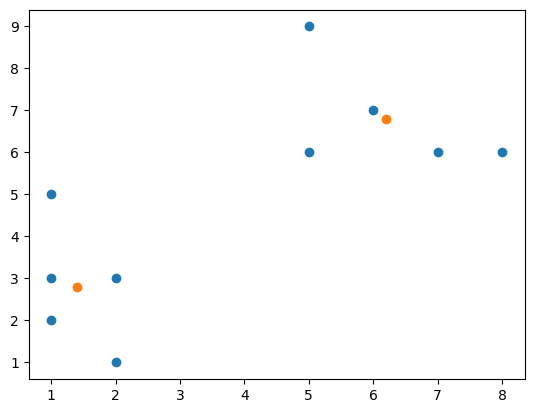

In [306]:
plt.scatter(data1[:, 0], data1[:, 1])
plt.scatter(centers[:, 0], centers[:, 1])

plt.show()

### Performing Cluster Analysis on S&P500 market data to encourage diversification

In [307]:
def readData(filepath):
    file = open(filepath, 'r')

    LoL = []

    for line in file:
        vals = line.strip().split(',')
        temp_list = []
        for val in vals:
            temp_list.append(val)
        LoL.append(temp_list)

    file.close()

    return LoL

In [308]:
listOfLists = readData(os.path.join(datadir, "financials.csv"))

financialsDF = pd.DataFrame(listOfLists)

financialsDF

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,Symbol,Name,Sector,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,SEC Filings
1,MMM,3M Company,Industrials,222.89,24.31,2.3328617,7.92,259.77,175.49,138721055226,9048000000,4.3902707,11.34,http://www.sec.gov/cgi-bin/browse-edgar?action...
2,AOS,A.O. Smith Corp,Industrials,60.24,27.76,1.1479592,1.7,68.39,48.925,10783419933,601000000,3.5754826,6.35,http://www.sec.gov/cgi-bin/browse-edgar?action...
3,ABT,Abbott Laboratories,Health Care,56.27,22.51,1.9089824,0.26,64.6,42.28,102121042306,5744000000,3.7404804,3.19,http://www.sec.gov/cgi-bin/browse-edgar?action...
4,ABBV,AbbVie Inc.,Health Care,108.48,19.41,2.4995599,3.29,125.86,60.05,181386347059,10310000000,6.291571,26.14,http://www.sec.gov/cgi-bin/browse-edgar?action...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,XYL,Xylem Inc.,Industrials,70.24,30.94,1.1700794,1.83,76.81,46.86,12915021000,722000000,2.7262094,5.31,http://www.sec.gov/cgi-bin/browse-edgar?action...
502,YUM,Yum! Brands Inc,Consumer Discretionary,76.3,27.25,1.7970798,4.07,86.93,62.85,27003303098,2289000000,6.3136363,212.08,http://www.sec.gov/cgi-bin/browse-edgar?action...
503,ZBH,Zimmer Biomet Holdings,Health Care,115.53,14.32,0.7948336,9.01,133.49,108.17,24454698119,2007400000,3.1648953,2.39,http://www.sec.gov/cgi-bin/browse-edgar?action...
504,ZION,Zions Bancorp,Financials,50.71,17.73,1.480933,2.6,55.61,38.43,10670678640,0,3.7945793,1.42,http://www.sec.gov/cgi-bin/browse-edgar?action...


In [309]:
financialsDFClean = financialsDF.copy()

financialsDFClean.drop([0,1,2,3,4,6,7,8,10,11,12,13], axis=1, inplace=True)
financialsDFClean.drop([0], axis=0, inplace=True)

lf = lambda string_to_float: float(string_to_float)

financialsDFClean[5] = financialsDFClean[5].apply(lf)
financialsDFClean[9] = financialsDFClean[9].apply(lf)

financialsDFClean

,5,9
1,2.332862,1.387211e+11
2,1.147959,1.078342e+10
3,1.908982,1.021210e+11
4,2.499560,1.813863e+11
5,1.714470,9.876586e+10
...,...,...
501,1.170079,1.291502e+10
502,1.797080,2.700330e+10
503,0.794834,2.445470e+10
504,1.480933,1.067068e+10


In [310]:
financials_array = financialsDFClean.to_numpy()

print(financials_array)

[[2.33286170e+00 1.38721055e+11]
 [1.14795920e+00 1.07834199e+10]
 [1.90898240e+00 1.02121042e+11]
 ...
 [7.94833600e-01 2.44546981e+10]
 [1.48093300e+00 1.06706786e+10]
 [6.82372030e-01 3.59911098e+10]]


In [311]:
centers, clusters = kmeans(financials_array, 10)

print(centers)

Centers:
 [[0.00000000e+00 5.69512308e+09]
 [1.57954120e+00 8.09508034e+11]
 [2.01850300e+00 4.05435474e+10]
 [2.65486720e+00 2.11536000e+11]
 [2.46448730e+00 3.04453208e+10]
 [6.82372030e-01 3.59911098e+10]
 [9.39267800e-01 2.49065303e+10]
 [4.00546200e+00 2.10188873e+10]
 [0.00000000e+00 1.11814938e+10]
 [0.00000000e+00 1.18274537e+10]] 

[[2.15369003e+00 6.90595204e+09]
 [5.75722000e-01 6.95190401e+11]
 [2.75227881e+00 1.93213801e+11]
 [1.93463354e+00 3.13110927e+11]
 [1.75761391e+00 6.03955418e+10]
 [1.91993943e+00 1.02352095e+11]
 [2.06596744e+00 3.86322617e+10]
 [1.76933113e+00 2.39785080e+10]
 [1.64340110e+00 1.16593478e+10]
 [1.91514960e+00 1.63333718e+10]]


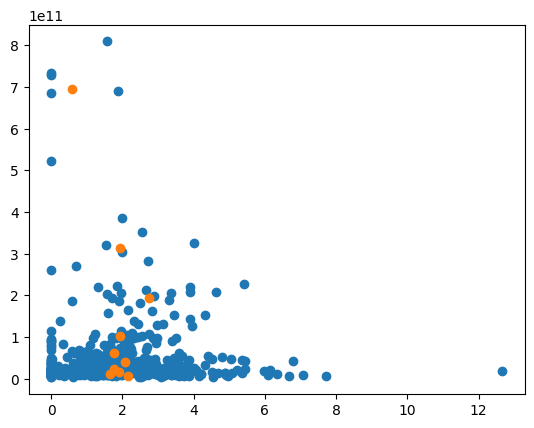

In [312]:
plt.scatter(financials_array[:, 0], financials_array[:, 1])
plt.scatter(centers[:,0], centers[:,1])

plt.show()